In [ ]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

<h1><center>Lecture 14:<br>N-grams<br></center></h1><h2><center>Tuesday Feb 28 2023<br></center></h2>


<center><img src="https://www.tutorialexample.com/wp-content/uploads/2019/09/python-sentence-n-grams-model.png" width=800 height=800 /></center>

# Updates
### This week: N-grams & language models
* Jurafsky & Martin Chp 3 - Focus on Sections 3.1 and 3.2
* HW 3 due tonight
* Quiz 8 due Friday

# Final project

* Final project guidelines now on Canvas

# Moving on... Language models!

* We need to be able to make programs that resemble human-like language
* Goal: assign probability to sentence/phrase/word
* What NLP tasks would this be good for?

## Application of language models
### Machine translation
* P(**high** winds tonight) > P(**large** winds tonight)

### Spell correction
* The office is about fifteen **minuets** from my house
    * P(about fifteen **minutes** from) > P(about fifteen **minuets** from)

### Grammar correction
* **Their** are so many bears in the backyard
    * P(**There** are so many bears in the backyard) > P(**Their** are so many bears in the backyard)

## Application of language models
### Speech recognition
* P(I saw a van) > P(eyes awe of an)

### And many more areas!
* Predictive text
* Augementative and alternative communication (AAC)

<center><img src="https://support.apple.com/library/content/dam/edam/applecare/images/en_US/iOS/ios15-iphone12-pro-messages-predictive-text.png" width=200 height=200 /></center>

## So what is a language model?

* Compute the probability of a sentence/phrase
$$P(W) = P(w_1, w_2, w_3, w_4...w_n)$$


* Compute the probability of an upcoming word
$$P(w_5|w_1, w_2, w_3, w_4)$$

* A **Language model (LM)** is a model that computes either of these

## How can we estimate the probability of a word given its context?
* Let's look at "Emma" by Jane Austen again in the gutenberg corpus
* What's the probability of getting _"recovering"_ after _"there was no"_?<br>
    * We can calculate this fairly easily using what we already know!

$$\frac{\text{# of "there was no recovering"}}{\text{# of "there was no"}}$$

In [1]:
import nltk
from nltk.corpus import gutenberg
emma = gutenberg.raw('austen-emma.txt').lower()

In [2]:
emma.count("there was no recovering")/emma.count("there was no")

0.021739130434782608

In [3]:
emma.count("there was no")

46

In [4]:
emma.count("there was no recovering")

1

# Individual exercise: Now find the probability of getting the following.

1. "advice" after "very good" in "carrol-alice.txt"
2. "heads" after "off with their" in "carrol-alice.txt"
3. "advice" after "very good" in "austen-emma.txt"
4. "heads" after "off with their" in "austen-emma.txt"

## Why is this not a great method for predicting text?

* Everything looks fine with \#1!

In [5]:
# 1. "very good advice" in "carrol-alice.txt"
alice = gutenberg.raw("carroll-alice.txt").lower()
alice.count("very good advice")/alice.count("very good") # okay, cool

0.25

* We can even compare it to instances of other words after "very good"

In [6]:
import re
very_good = re.findall("very good \w+", alice)
print(very_good)

['very good opportunity', 'very good advice', 'very good height']


* \#2

In [7]:
# 2. "off with their heads" in "carrol-alice.txt"
alice.count("off with their heads")/alice.count("off with their")

1.0

* This means that any time we see "off with their", the next word must be "heads".
* But what about:
    * "off with their shoes"
    * "Something is off with their timing".
    * "I think the restaurant is a little off with their service".

\#3 looks okay!

In [8]:
# 3. "very good advice" in "austen-emma.txt"
emma = gutenberg.raw("austen-emma.txt").lower()
emma.count("very good advice")/emma.count("very good")

0.02127659574468085

\#4 presents another problem...

In [9]:
# 4. "off with their heads" in "austen-emma.txt"
emma.count("off with their heads")/emma.count("off with their") # Uh oh...

ZeroDivisionError: division by zero

* We can't divide by 0!
    * Meaning there are no instances of "off with their"
    * But we know (and have seen evidence) that this is a perfectly grammatical sequence of words.

### There are too many possible sentences!
   * In fact, an infinite number of sentences.
    
### And never enough data!

# Markov Assumption
* "Markov models are the class of probabilistic models that assume we can predict the probability of some future unit without looking too far into the past"
* We can instead estimate based on a smaller context
* Instead of:<br>
    $$P(w_i|w_1, w_2...w_{i-1})$$
* We use:<br>
    $$P(w_i|w_{i-k}...w_{i-1})$$
    

# Chain Rule
* So if we want to find the P("its water is so transparent")...
* We should use the Chain Rule
* Get the probability of all the smaller contexts and multiply them.
 $$P(\text{"its water is so transparent"}) = P(\text{its}) \text{ x } P(\text{water|its}) \text{ x } P(\text{so|its water is})\text{ x } P(\text{transparent|its water is so})$$
* But what are these "smaller parts"?

# n-gram Language Models

* **n-gram**: a sequence of _n_ words
* unigrams: single word
* bigrams: two words
* trigrams: three words
* 4-grams: four words
* And so on...

* **The baby pet the cat gently.**
* What are all the unigrams in this sentence?

the, baby, pet, the, cat, gently

* **The baby pet the cat gently.**
* What are all the bigrams in this sentence?

\<s> the<br>
the baby<br>
baby pet<br>
pet the<br>
the cat<br>
cat gently<br>
gently \</s>

* **The baby pet the cat gently.**
* What about all the trigrams?

\<s> the baby <br>
the baby pet<br>
baby pet the<br>
pet the cat<br>
the cat gently <br>
cat gently \</s>

# Getting n-grams easily
* Thank you again, NLTK! =)
* Built-in n-grams function
    * `nltk.bigrams()`
    * `nltk.trigrams()`

In [10]:
sent = ["Colorless", "green", "ideas", "sleep", "furiously"]
list(nltk.bigrams(sent))

[('Colorless', 'green'),
 ('green', 'ideas'),
 ('ideas', 'sleep'),
 ('sleep', 'furiously')]

In [11]:
list(nltk.trigrams(sent))

[('Colorless', 'green', 'ideas'),
 ('green', 'ideas', 'sleep'),
 ('ideas', 'sleep', 'furiously')]

* To get larger n-grams than tri-grams...
* import `from nltk.util import ngrams`
* `ngrams(text, n-gram length)`

In [12]:
from nltk.util import ngrams
sent = "Atlas laughed so loudly that the colorless green ideas became furious".split()
list(ngrams(sent, 5))

[('Atlas', 'laughed', 'so', 'loudly', 'that'),
 ('laughed', 'so', 'loudly', 'that', 'the'),
 ('so', 'loudly', 'that', 'the', 'colorless'),
 ('loudly', 'that', 'the', 'colorless', 'green'),
 ('that', 'the', 'colorless', 'green', 'ideas'),
 ('the', 'colorless', 'green', 'ideas', 'became'),
 ('colorless', 'green', 'ideas', 'became', 'furious')]

## But for many tasks we may also want/need to know sentence boundaries...

* We can "pad" sentences with the `pad_sequence` package

In [14]:
from nltk.util import pad_sequence
padded_sent = list(pad_sequence(sent, pad_left=True, left_pad_symbol="<s>", 
                  pad_right=True, right_pad_symbol="</s>", n = 2))

list(ngrams(padded_sent,4))


[('<s>', 'Atlas', 'laughed', 'so'),
 ('Atlas', 'laughed', 'so', 'loudly'),
 ('laughed', 'so', 'loudly', 'that'),
 ('so', 'loudly', 'that', 'the'),
 ('loudly', 'that', 'the', 'colorless'),
 ('that', 'the', 'colorless', 'green'),
 ('the', 'colorless', 'green', 'ideas'),
 ('colorless', 'green', 'ideas', 'became'),
 ('green', 'ideas', 'became', 'furious'),
 ('ideas', 'became', 'furious', '</s>')]

## Simplest Markov assumption: unigrams
* Remember the Makrov assumption allows us to make predictions based on smaller environments
* Modeling a language based only on the probability of individual words

In [16]:
emma = gutenberg.words('austen-emma.txt')

In [17]:
import random # This package contains the random.choice() function

emmaUnigramsLM = [random.choice(emma) for i in range(100)]
print(" ".join(emmaUnigramsLM))

cold Frank than her Elton which sure plenty swiftly I . - be , all ; removing with and of school , she Must have gravel she , better and All am , little vouchsafed to up situation ." never . her He the her back do for " producing indeed to Goddard !-- Abbey sometimes her been whole her , self rather , anxious assist is Mr a fancy ?" any merely !"-- had you entreated decidedly , some him an , best comfortable and you your or of , it my and - Emma replied to , fast


## Markov assumption with bigrams
* Let's try instead with bigrams
* Remember that we can create **frequency distributions** to look at how often each bigram occurs

In [19]:
emmaBigrams = list(nltk.bigrams(emma))
fdBigrams = nltk.FreqDist(emmaBigrams)
fdBigrams.most_common()[:20]

[((',', 'and'), 1879),
 (('Mr', '.'), 1153),
 (("'", 's'), 932),
 ((';', 'and'), 866),
 (('."', '"'), 757),
 (('Mrs', '.'), 699),
 (('to', 'be'), 595),
 (('.', 'I'), 570),
 ((',', 'I'), 568),
 (('of', 'the'), 556),
 (('in', 'the'), 434),
 ((';', 'but'), 427),
 (('.', 'Weston'), 426),
 (('.', '"'), 415),
 (('.', 'She'), 413),
 ((',', '"'), 398),
 (('I', 'am'), 395),
 (('.', 'Elton'), 381),
 ((',', 'that'), 359),
 (('had', 'been'), 308)]

* And remember conditional frequency distributions?

In [20]:
cfdBigrams = nltk.ConditionalFreqDist(emmaBigrams)
cfdBigrams['living'] # We'll come back to this next class.

FreqDist({'with': 3, 'in': 3, 'together': 2, ',': 2, 'alone': 1, 'child': 1, ';': 1, 'almost': 1, 'under': 1, 'constantly': 1, ...})

In [21]:
emmaBigrams = list(nltk.bigrams(emma))
emmaBigramsLM = [" ".join(random.choice(emmaBigrams)) for i in range(100)]
print(" ".join(emmaBigramsLM))

?" But the time ." " followed them into her of all in Mrs ? had . CHAPTER he must glad you so fast have been in favour window - feelings which of the to Hartfield he could Miss Bates , to as if did it excellent looks gone through give any of owning said Emma , she Harriet . What is ? You made excuses that is had ever and tosses or even had made of the such words He had been too hundred chances her father who had us . Mrs . having any make his subjects took see him , I came into Churchill ' led to ' s he married her very discrimination , same good , but or any those who Knightley ' I have Mr . been telling collecting herself they were justice you at the , my whether I do very the door very extraordinary have done is a " seemed friend for , and that he , it his own as I either to thing that and Mr see her ?-- Quite , but incumbent on most serious ; that change . then , engagement . opinion of assure you season ."


## Markov assumption with trigrams
* Let's try instead with trigrams

In [22]:
emmaTri = list(nltk.trigrams(emma))
emmaTriLM = [" ".join(random.choice(emmaTri)) for i in range(100)]
print(" ".join(emmaTriLM))

would rather done got home ; the low ; subject cut up place .-- Emma that place in a treasure of was so long submissively , and assure you , so very handsome , though no at the top " Frank was " they are nearly half an passed ,-- aware carriage was sent a temporary increase Bates , who CHAPTER V " gives me the myself intelligible yesterday seeing her . ? Do try looking over William , and she a stranger , understand what you have his fireside luxuries of her be , and what every field had shewn them Fairfax ' s rules for it try what I out ; and she was twelve your friends may Smith was quite to bear next than the remembrance turn out a ?" " Very hope not infectious walk , which , must you her -- and with the woman he travel now . Knightley , just then took have nothing to Seven miles were first , without decidedly warm admiration I must do ." " Yes no , no very near at In that respect may pass us in water - by hearing that herself , " ; and for life . I , and have gave her to be the foll

## n-grams and linguistic phenomena
* Let's look at this graph taken from J&M Chp. 3
* Bigram counts for some words in Berkeley Restaurant Project corpus
* What makes some counts really high and what makes some really low/0?

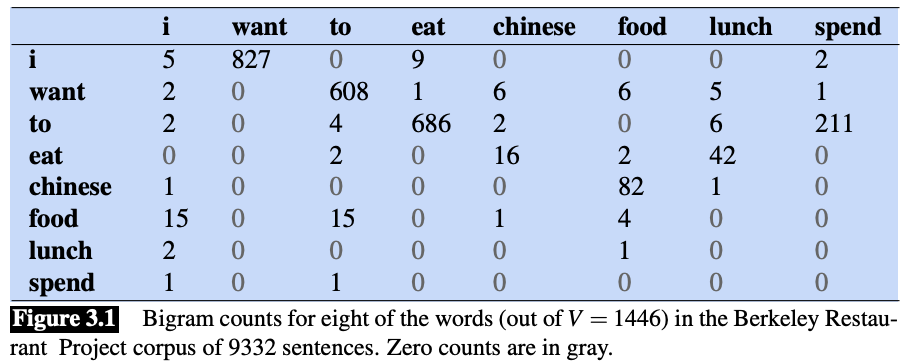

##  Maximum Likelihood Estimate
* We need to be able to use n-grams to get calculate the probability of a word/phrase.

\<s> I am Sam \</s> <br>
\<s> Sam I am \</s> <br>
\<s> I do not like green eggs and ham \</s> <br>

Based on this 'corpus', what is the probability of getting "I" _given_ the beginning of a sentence?

P( I | \<s> ) = $\frac{2}{3}$ or 67%

\<s> I am Sam \</s> <br>
\<s> Sam I am \</s> <br>
\<s> I do not like green eggs and ham \</s> <br>

What is the probability of getting "Sam" _given_ "am"?

P( Sam | am ) = $\frac{1}{2}$ or 50%

* But how can we get the probability of an entire sentence?
* Perhaps a sentence that doesn't already exist in the corpus.

# Chain Rule
* We should use the Chain Rule
 $$P(\text{"its water is so transparent"}) = P(\text{its}) \text{ x } P(\text{water|its}) \text{ x } P(\text{so|its water is})\text{ x } P(\text{transparent|its water is so})$$

* What's the probability of getting _"cats like dogs"_ given the following data?

\<s> I like dogs \</s> <br>
\<s> I like cats \</s> <br>
\<s> Cats do not usually like dogs \</s> <br>
\<s> I usually side with dogs \</s> <br>
\<s> Cats like it that way \</s> <br>
\<s> Dogs are ambivalent \</s>

* We can use the Chain Rule on bigrams.

$$P(\text{<s> cats like dogs </s>})=$$
$$P(\text{cats | <s>) x}\\ P(\text{like | cats) x}\\ P(\text{dogs | like) x}\\ P(\text{</s> | dogs)}$$

$$P(\text{cats | <s>)} \color{blue}{0.33} \text{x}\\P(\text{like | cats) } \color{blue}{0.33} \text{x}\\ P(\text{dogs | like) } \color{blue}{0.5} \text{x}\\P(\text{</s> | dogs)} \color{blue}{0.75}$$


$$P(\text{<s> cats like dogs </s>})= \color{red}{0.04}$$

## Log probabilities
* We have issues here.
    * **Underflow** (multiplying many small numbers will give us an even smaller probability)
    * So longer sentences will always have pretty small probabilities
* It's better to look at these as log probabilities.
    * Transform to log and add
    $$ p_1 \text{x} p_2 \text{x} p_3 \text{x} p_4 = \text{log}p_1 + \text{log}p_2 + \text{log}p_3 + \text{log}p_4$$

## Transforming probability of "Cats like dogs" to log

In [23]:
import math # This package has a log function

0.33 * 0.33 * 0.5 * 0.75

0.040837500000000006

In [25]:
math.log(0.33) + math.log(0.33) + math.log(0.5) + math.log(0.75)

-3.1981545020549484

## Let's try the Chain Rule again.

What is the probability of getting "I do not like Sam", given the following corpus?

\<s> I am Sam \</s> <br>
\<s> Sam I am \</s> <br>
\<s> I do not like green eggs and ham \</s> <br>

$$P(\text{<s> I do not like Sam </s>})=$$
$$P(\text{I | <s>) x}\\ P(\text{do | I) x}\\ P(\text{not | do) x}\\ P(\text{like | not) x}\\P(\text{Sam | like) x}\\P(\text{</s> | Sam) x}$$

Uh oh...

$$P(\text{I | <s>)} \color{blue}{0.67} \text{x}\\P(\text{do | I) } \color{blue}{0.33} \text{x}\\ P(\text{not | do) } \color{blue}{1.00} \text{x}\\ P(\text{like | not)} \color{blue}{1.00} \text{x}\\P(\text{Sam | like)} \color{blue}{0} \text{x}\\P(\text{</s> | Sam)} \color{blue}{0.33}$$


$$P(\text{<s> I do not like Sam </s>})= \color{red}{0%}$$

## What is the problem here?

* We can often get 0 when our test set (new data) doesn't look like our training set (existing data)

## What do we do if we get probabilities of 0?
* There are several ways to deal with this!
* Simplest:
    * **Add-one smoothing (AKA Laplace Smoothing)**
    * Just pretend we saw each word one more time than we did!

What is the probability of getting "I do not like Sam", given the following corpus?

\<s> I am Sam \</s> <br>
\<s> Sam I am \</s> <br>
\<s> I do not like green eggs and ham \</s> <br>

$$P(\text{I | <s>)} \color{blue}{0.67} \text{x}\\P(\text{do | I) } \color{blue}{0.33} \text{x}\\ P(\text{not | do) } \color{blue}{1.00} \text{x}\\ P(\text{like | not)} \color{blue}{1.00} \text{x}\\P(\text{Sam | like)} \color{blue}{0} \text{x}\\P(\text{</s> | Sam)} \color{blue}{0.33}$$


$$P(\text{<s> I do not like Sam </s>})= \color{red}{0%}$$

# Challenges with n-gram modeling

## Why not extend n-gram models?
* To 7-grams, 8-grams, etc?

* We've seen problems with getting accurate predictions if we don't have a large enough corpus

## Okay...so why not keep n-grams smaller - trigrams?

* Long-distance dependencies make this difficult.

"The **computer** which I had just put into the machine room on the fifth floor **crashed**".

* But for most purposes, they work okay!
* We'll see more LMs next week.

# Next class: Evaluating language models

* How do we know that we have a _good_ or _bad_ LM?
    * There are ways to measure this!